Implementation of discrete algorithms

Made by Yura Sahaidak and Bohdan Ozarko

In [3]:
import random
import timeit
import networkx as nx
from networkx import NetworkXUnbounded
import matplotlib.pyplot as plt
from itertools import combinations, groupby
from networkx.algorithms import tree
from networkx.algorithms import bellman_ford_predecessor_and_distance
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

Random graph generator taken from given jupiter file. We will use this to get random graph and try our algorithms

In [5]:
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
        
    return G

Random connected weighted graph

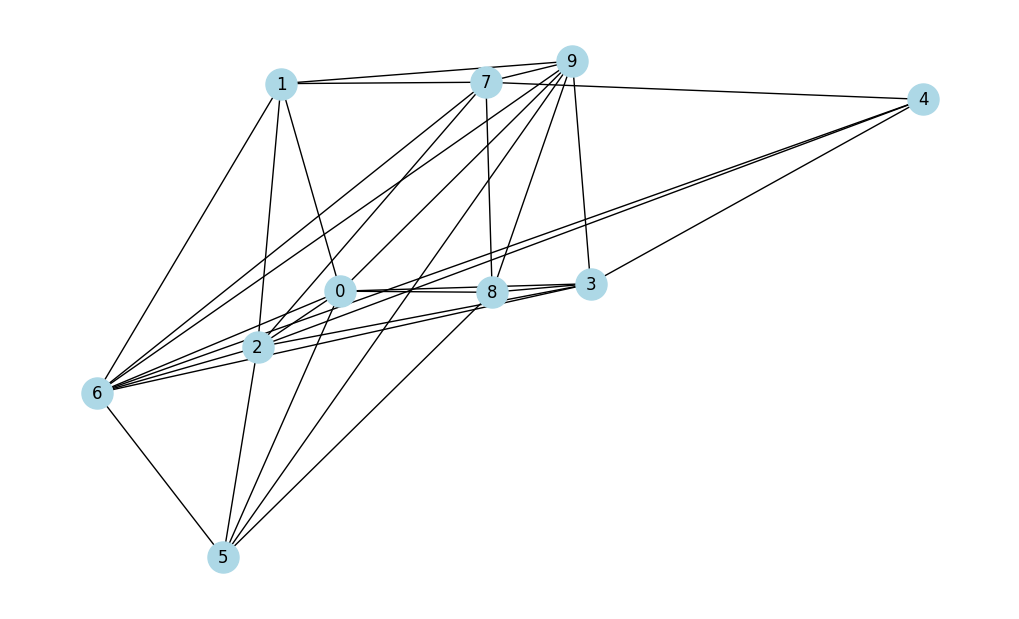

In [16]:
G = gnp_random_connected_graph(10, 0.5, False, True)

Task 1

Kruslal Algorithm

This is example of build-in algo

In [17]:
minim = sorted(list(tree.minimum_spanning_tree(G, algorithm='kruskal').edges(data=True)))
minim

[(0, 3, {'weight': 0}),
 (1, 7, {'weight': 3}),
 (2, 4, {'weight': -1}),
 (3, 6, {'weight': 5}),
 (4, 6, {'weight': -2}),
 (5, 8, {'weight': 4}),
 (5, 9, {'weight': -2}),
 (6, 7, {'weight': 2}),
 (6, 9, {'weight': -4})]

Our kruskal algorithm adds zero-node as start point and adds edges by looking for nearby nods with lowers weight. Also, only one node from edge can be in tree at the same time, otherwise we will build cycle. We also see, that we got equal result for that graph, but this does not guarantee that this will be the case for all graphs

In [18]:
def kruskal_mannual(graph) -> list[tuple]:
    edges = list(graph.edges(data=True))
    if len(edges) == 0:
        return []
    edges_lst = sorted(edges, key = lambda x: x[2]['weight'])
    node_lst = [edges_lst[0][0]]
    edge_lst = []
    i = 0
    j = 0
    amount = len(graph.nodes(data=True))
    while i < amount:
        j = 0
        while j < len(edges_lst):
            if edges_lst[j][0] in node_lst and edges_lst[j][1] not in node_lst:
                node_lst.append(edges_lst[j][1])
                edge_lst.append((edges_lst[j][0], edges_lst[j][1], edges_lst[j][2]))
                edges_lst.remove(edges_lst[j])
                break
            elif edges_lst[j][0] not in node_lst and edges_lst[j][1] in node_lst:
                node_lst.append(edges_lst[j][0])
                edge_lst.append((edges_lst[j][0], edges_lst[j][1], edges_lst[j][2]))
                edges_lst.remove(edges_lst[j])
                break
            elif edges_lst[j][0] in node_lst and edges_lst[j][1] in node_lst:
                edges_lst.remove(edges_lst[j])
            else:
                j += 1
        i += 1
    return edge_lst

manual = sorted(kruskal_mannual(G))
print(manual)

print(f"\nAre equal - {minim == manual}")

[(0, 3, {'weight': 0}), (1, 7, {'weight': 3}), (2, 4, {'weight': -1}), (3, 6, {'weight': 5}), (4, 6, {'weight': -2}), (5, 8, {'weight': 4}), (5, 9, {'weight': -2}), (6, 7, {'weight': 2}), (6, 9, {'weight': -4})]

Are equal - True


Next function will be used to compare algorithms. To check if they return same result for everu time, this function generate random connected graph, each time with bigger amount of edges, and compares returned lists of edges if they are equal. After, it checks time needed to get minimum tree and draws appropriate diagram. We also show total time of time algos used for all iterations in total

100%|██████████| 50/50 [00:02<00:00, 19.10it/s]

After 50 iterations results are:
1. For build in algorithm - 0.35136590036563575
2. For our algoritm - 0.5500724010635167

That means, that built in algorithm works faster


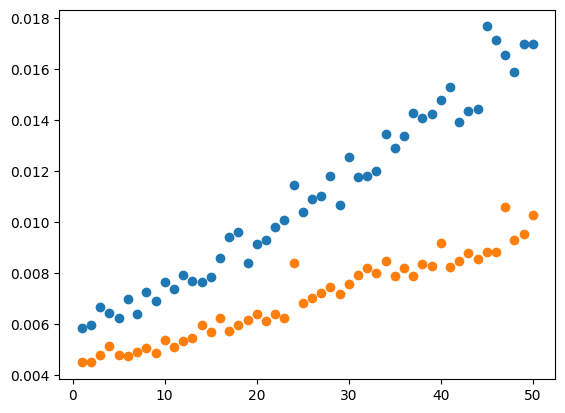

In [101]:
def comperer_krusk(number) -> None:
    """Compares ours and built in algo"""
    i = 0
    y_axis_man = []
    y_axis_built = []
    x_axis = range(1, number+1)
    for i in tqdm(range(100, number+100)):
        graph = gnp_random_connected_graph(i, 0.5, False, False)
        edges = list(graph.edges(data=True))
        manual_edges = kruskal_mannual(edges, graph)
        built_in_algo = tree.minimum_spanning_tree(graph, algorithm="kruskal")
        built_in_edges = sorted(list(built_in_algo.edges(data=True)))
        check = True if built_in_edges == sorted(manual_edges) else False
        i += 1
        if check is False:
            break
        default = timeit.timeit(lambda: tree.minimum_spanning_tree(graph, algorithm="kruskal"), number=1)
        our = timeit.timeit(lambda: kruskal_mannual(edges, graph), number=1)
        y_axis_built.append(default)
        y_axis_man.append(our)
    # print(f"Edges lists are equal after {number} checks - {check}\n")
    print(f"""After {number} iterations results are:
1. For build in algorithm - {sum(y_axis_built)}
2. For our algoritm - {sum(y_axis_man)}

That means, that {"our" if sum(y_axis_man) < sum(y_axis_built) else "built in"} algorithm works faster""")
    plt.scatter(x_axis, y_axis_man)
    plt.scatter(x_axis, y_axis_built)

comperer_krusk(50)

Task 2

Bellman-Frod algorithm


Random directed graph


Let's see random directed graph

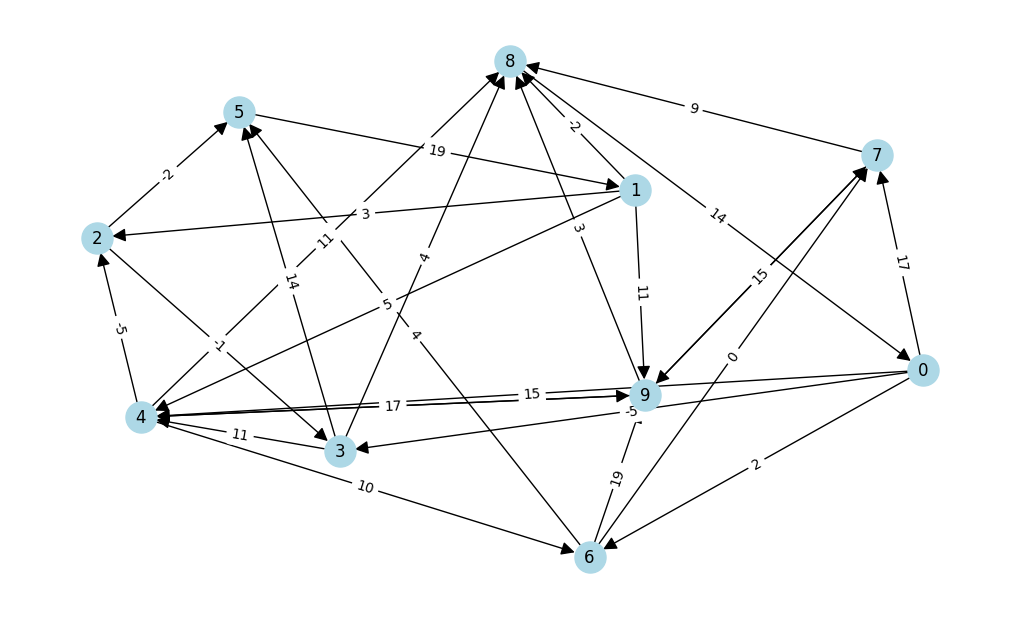

In [85]:
dir_g = gnp_random_connected_graph(10, 0.5, True, True)

This is built-in bellman algorithm and to be alble to compare results with our algorithm, we will get list of nodes and ways from this algo

In [ ]:
def built_in_bellman(graph):
    out_lst = []
    try:
        pred, dist = bellman_ford_predecessor_and_distance(graph, 0)
        for k, v in dist.items():
            out_lst.append((k, v))
    except:
        return "Negative cycle detected"
    return out_lst

bell_build = built_in_bellman(dir_g)
bell_build

[(0, 0),
 (1, 18),
 (2, 1),
 (3, -5),
 (4, 6),
 (5, -1),
 (6, 2),
 (7, 2),
 (8, -1),
 (9, 12)]

Next, we will create the same type of list from our algorithm.
The algorithm has two main sequences:
edges - list which contains all one-step-long paths; dists - dictionary that will contain the shortest paths. At first algorthm iterates through all edges that begin from start node and saves their weights. At next iteration it takes saved to dists distances ads to them distances from the edges list and counts weight. If weight of the sum is smaller that the appearing distance in dists dictionary, the algorithm rewrites it. At first iteration it looks only at one-edge paths, at second - two-edge paths and compares it with shorter and so on. At the end the algorithm makes additional iteration to check whether the graph don't have a negative-weight cycle in it.

In [95]:
def belman_ford(G, st_node: int = 0):
    nodes = list(G.nodes())
    edges = list(G.edges(data=True))

    dists = {node: float('inf') for node in nodes}
    dists[st_node] = 0

    predecessors = {node: [] for node in nodes}
    predecessors[st_node] = []

    for _ in range(len(nodes) + 1):
        # stores values of dists of previous iteration. If the dictionary will change
        # after len(nodes) + 1 iteration, a negative weight cycle is in the graph
        prev_dists = dict(dists)

        for edge in edges:
            node_1, node_2, dct = edge
            weight = dct['weight']

            if dists[node_2] > dists[node_1] + weight:
                dists[node_2] = dists[node_1] + weight

                predecessors[node_2] = [node_1]

    if prev_dists != dists:
        return ("Negative cycle detected" for _ in range(2))

    return predecessors, dists

def manual_belman(graph) -> list[tuple[int]]:
    '''Gets comparable list'''
    preds, dists = belman_ford(graph)
    lst = []
    if isinstance(dists, str):
        return dists
    else:
        for node_1, node_2 in dists.items():
            if not isinstance(node_2, float):
                lst.append((node_1, node_2))
    return lst

bell_man = sorted(manual_belman(dir_g))
print(bell_man)

print(f"\nAre equal - {bell_man==bell_build}")

[(0, 0), (1, 18), (2, 1), (3, -5), (4, 6), (5, -1), (6, 2), (7, 2), (8, -1), (9, 12)]

Are equal - True


Here we will compare them in the same way as we did for Kruskal algo

100%|██████████| 50/50 [00:06<00:00,  7.39it/s] 


Lists are equal after 50 checks - True

After 50 iterations results are:
1. For build in algorithm - 0.991764900740236
2. For our algoritm - 4.997087199473754

That means, that built in algorithm works faster


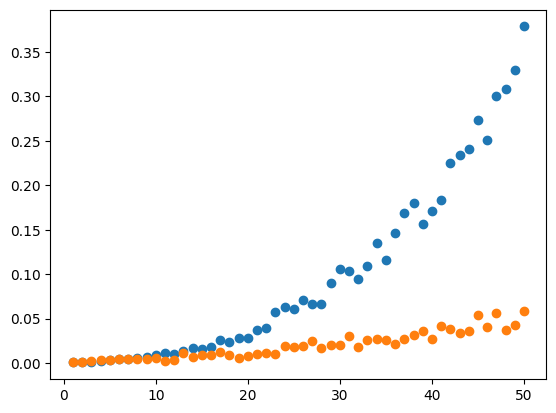

In [91]:
def comperer_bell(number):
    y_axis_man = []
    y_axis_built = []
    x_axis = list(range(1, number+1))
    for i in tqdm(range(1, number+1)):
        while True:
            try:
                rand_grph = gnp_random_connected_graph(i, 0.2, True, False)
                default = timeit.timeit(lambda: bellman_ford_predecessor_and_distance(rand_grph, 0), number=100)
                break
            except NetworkXUnbounded:
                continue
        our = timeit.timeit(lambda: belman_ford(rand_grph), number=100)
        check = True if manual_belman(rand_grph) == sorted(built_in_bellman(rand_grph)) else False
        if check is False:
            break
        y_axis_man.append(our)
        y_axis_built.append(default)
    print(f"Lists are equal after {number} checks - {check}\n")
    print(f"""After {number} iterations results are:
1. For build in algorithm - {sum(y_axis_built)}
2. For our algoritm - {sum(y_axis_man)}

That means, that {"our" if sum(y_axis_man) < sum(y_axis_built) else "built in"} algorithm works faster""")
    plt.scatter(x_axis, y_axis_man)
    plt.scatter(x_axis, y_axis_built)

comperer_bell(50)

Conclusion

Both of our realisations works slower, because build in function are written on "C" language, which is low-level and works much faster